In [52]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Plotting in Python

https://matplotlib.org/gallery.html

In [53]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
xdata = np.linspace(0,5,100)
ydata = np.sqrt(xdata)

Text(0.5, 1.0, 'my first plot')

Text(0.5, 0, 'x values')

Text(0, 0.5, 'y values')

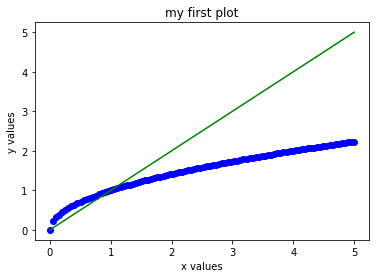

In [55]:
plt.plot(xdata, ydata, "bo", xdata, ydata ** 2, "g-")
plt.title("my first plot")
plt.xlabel("x values")
plt.ylabel("y values")

Subplots

<AxesSubplot:>

Text(0.5, 1.0, 'subplot1')

<AxesSubplot:>

Text(0.5, 1.0, 'subplot2')

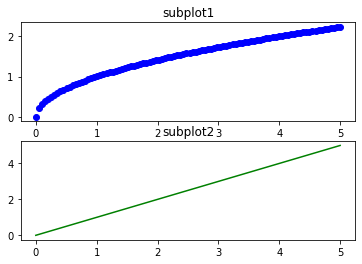

In [56]:
plt.subplot(2, 1, 1)
plt.plot(xdata, ydata, "bo")
plt.title("subplot1")

plt.subplot(2, 1, 2)
plt.plot(xdata, ydata**2, "g-")
plt.title("subplot2")

Text(0.5, 1.0, 'first plot')

Text(0.5, 1.0, 'second plot')

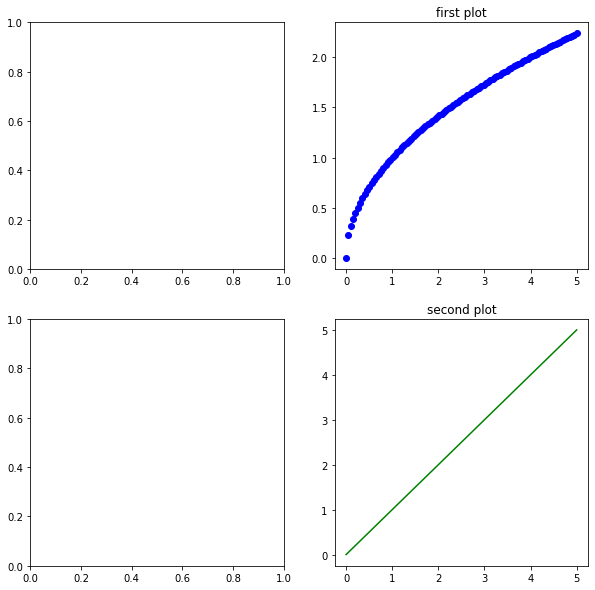

In [57]:
fig, ax= plt.subplots(nrows = 2, ncols = 2, figsize=(10,10))
ax[0,1].plot(xdata, ydata, "bo")
ax[0,1].set_title("first plot")

ax[1,1].plot(xdata, ydata**2, "g-")
ax[1,1].set_title("second plot")

# Exploratory Data Analysis

We will use Pandas and Matplotlib modules in this workbook. Seaborn module also has good visualizations methods. You are welcome to explore on your own.

In [58]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [59]:
grf = pd.read_csv("Data/grunfeld_cleaned.csv", index_col="invest")

#### Data Quality Checks

In [60]:
grf.columns
grf.columns = grf.columns.str.replace(" ", "")
grf.columns = [col.lower() for col in grf]
grf.columns

Index(['value', 'capital', 'firm', 'year'], dtype='object')

Index(['value', 'capital', 'firm', 'year'], dtype='object')

In [61]:
grf.head()
grf.shape

,value,capital,firm,year
invest,,,,
317.6,3078.5,2.8,General Motors,1935
391.8,4661.7,52.6,General Motors,1936
410.6,5387.1,156.9,General Motors,1937
257.7,2792.2,209.2,General Motors,1938
330.8,4313.2,203.4,General Motors,1939


(220, 4)

<AxesSubplot:xlabel='invest'>

<AxesSubplot:xlabel='invest'>

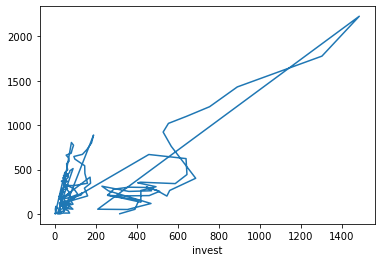

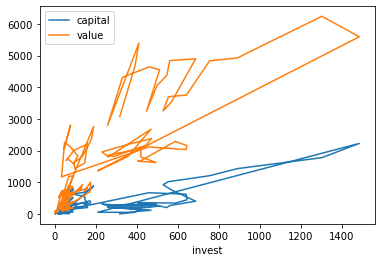

In [88]:
grf["capital"].plot()

grf[["capital","value"]].plot()

### Histogram

array([[<AxesSubplot:title={'center':'capital'}>]], dtype=object)

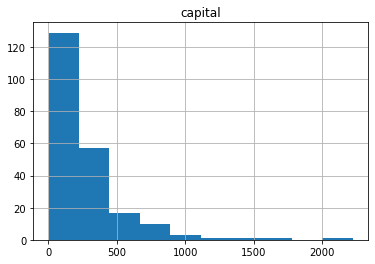

In [63]:
grf[['capital']].hist()

array([[<AxesSubplot:title={'center':'value'}>,
        <AxesSubplot:title={'center':'capital'}>]], dtype=object)

<AxesSubplot:ylabel='Frequency'>

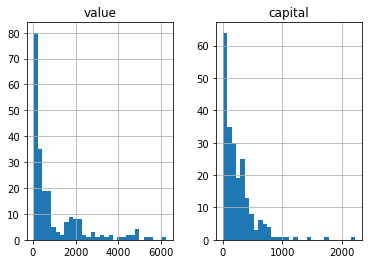

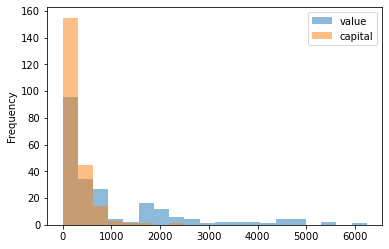

In [64]:
grf[['value','capital']].hist(bins=30)
grf[['value','capital']].plot.hist(bins=20, alpha =0.5)

#### Matplotlib Histogram

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Investment')

Text(0.5, 1.0, 'Grunfeld Investment Histogram')

(0.0, 120.0)

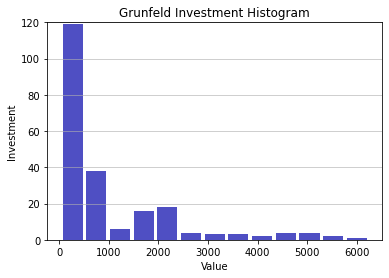

In [92]:
n, bins, patches = plt.hist(x=grf[['value']], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Investment')
plt.grid(axis='y', alpha=0.75)

plt.title('Grunfeld Investment Histogram')
# plt.text(3000, 200, 'Higher Value')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

<AxesSubplot:title={'center':'Histogram: Invest vs. Value'}, ylabel='Density'>

<AxesSubplot:title={'center':'Histogram: Invest vs. Value'}, ylabel='Frequency'>

Text(0, 0.5, 'Value')

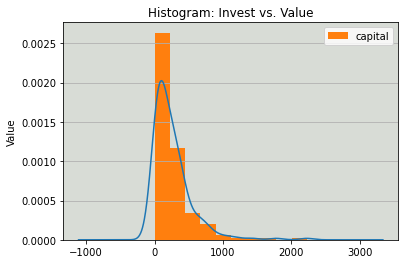

In [94]:
# troubleshoot this one
fig, ax = plt.subplots()
grf[['capital']].plot.kde(ax=ax, legend=False, title='Histogram: Invest vs. Value')
grf[['capital']].plot.hist(density=True, ax=ax)
ax.set_ylabel('Value')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

### Probability Plot

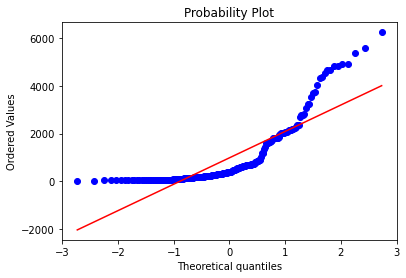

In [68]:
fig = plt.figure()
res = stats.probplot(grf['value'], plot=plt)

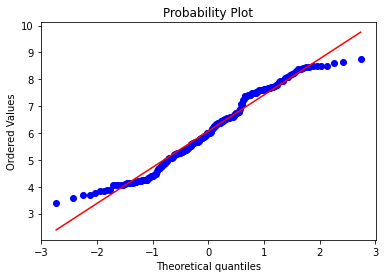

In [69]:
fig = plt.figure()
res = stats.probplot(np.log(grf['value']), plot=plt)

### Bar Chart

<BarContainer object of 11 artists>

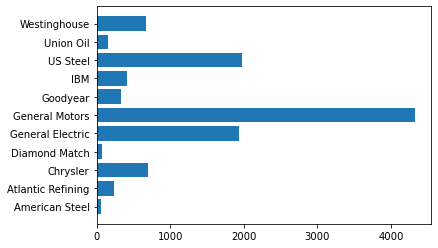

In [70]:
yax = grf.groupby(['firm'])['value'].mean()
plt.barh(yax.index, yax)

Text(0, 0.5, 'Money')

Text(0.5, 1.0, 'Value vs Capital by Firm')

([<matplotlib.axis.XTick at 0x212ec03c460>,
 [Text(0, 0, 'American Steel'),
  Text(1, 0, 'Atlantic Refining'),
  Text(2, 0, 'Chrysler'),
  Text(3, 0, 'Diamond Match'),
  Text(4, 0, 'General Electric'),
  Text(5, 0, 'General Motors'),
  Text(6, 0, 'Goodyear'),
  Text(7, 0, 'IBM'),
  Text(8, 0, 'US Steel'),
  Text(9, 0, 'Union Oil'),
  Text(10, 0, 'Westinghouse')])

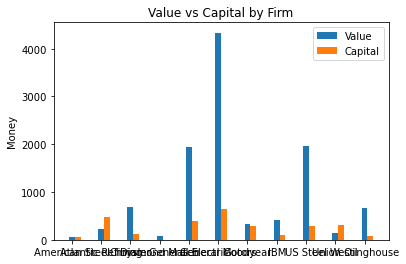

In [71]:
yax1 = grf.groupby(['firm'])['value'].mean()
yax2 = grf.groupby(['firm'])['capital'].mean()
ind = np.arange(yax1.shape[0])    
width = 0.2

p1 = plt.bar(ind, yax1, width)
p2 = plt.bar(ind+ width, yax2, width)


plt.ylabel('Money')
plt.title('Value vs Capital by Firm')
plt.xticks(ind, yax2.index)
plt.legend((p1[0], p2[0]), ('Value', 'Capital'))

plt.show()

### Boxplot

Text(0.5, 1.0, 'Capital Box Plot')

{'whiskers': [<matplotlib.lines.Line2D at 0x212ee02d190>,
 'caps': [<matplotlib.lines.Line2D at 0x212ee02d820>,
 'boxes': [<matplotlib.lines.Line2D at 0x212ee0dcac0>],
 'medians': [<matplotlib.lines.Line2D at 0x212ee02df40>],
 'fliers': [<matplotlib.lines.Line2D at 0x212edf6d310>],
 'means': []}

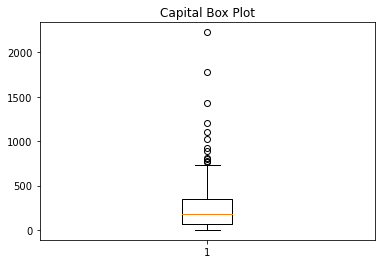

In [72]:
fig1, ax1 = plt.subplots()
ax1.set_title('Capital Box Plot')
ax1.boxplot(grf['capital'])

<AxesSubplot:title={'center':'capital'}, xlabel='[year]'>

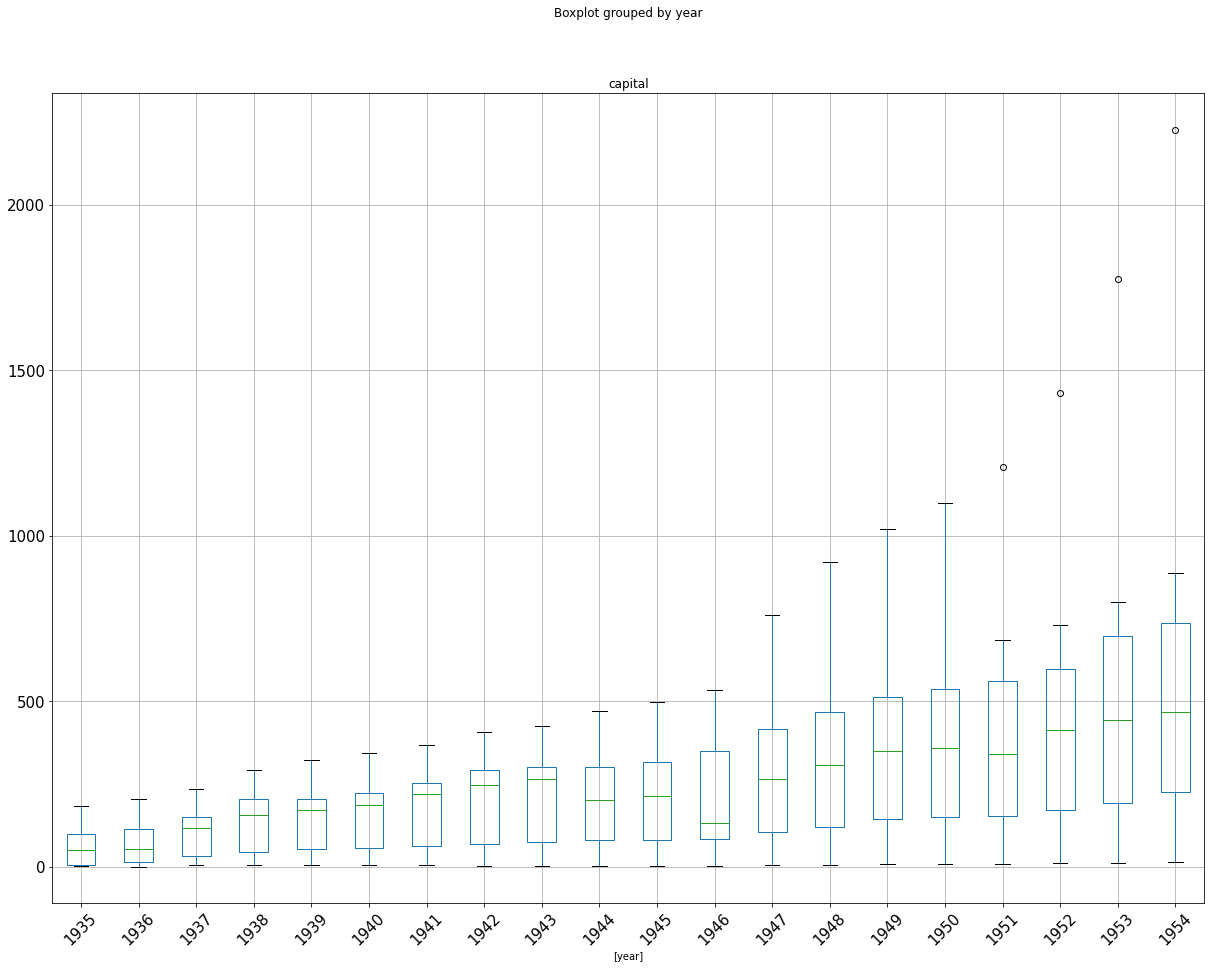

In [73]:
grf[['capital','year']].boxplot(column=['capital'], by=['year'], rot=45, fontsize=15, figsize=(20,15))

### Scatter Plot

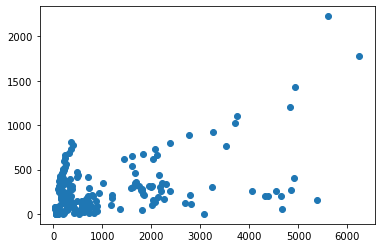

In [85]:
plt.scatter(grf['value'], grf['capital'])

array([[<AxesSubplot:xlabel='value', ylabel='value'>,
        <AxesSubplot:xlabel='capital', ylabel='value'>,
        <AxesSubplot:xlabel='year', ylabel='value'>],
       [<AxesSubplot:xlabel='value', ylabel='capital'>,
        <AxesSubplot:xlabel='capital', ylabel='capital'>,
        <AxesSubplot:xlabel='year', ylabel='capital'>],
       [<AxesSubplot:xlabel='value', ylabel='year'>,
        <AxesSubplot:xlabel='capital', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>]], dtype=object)

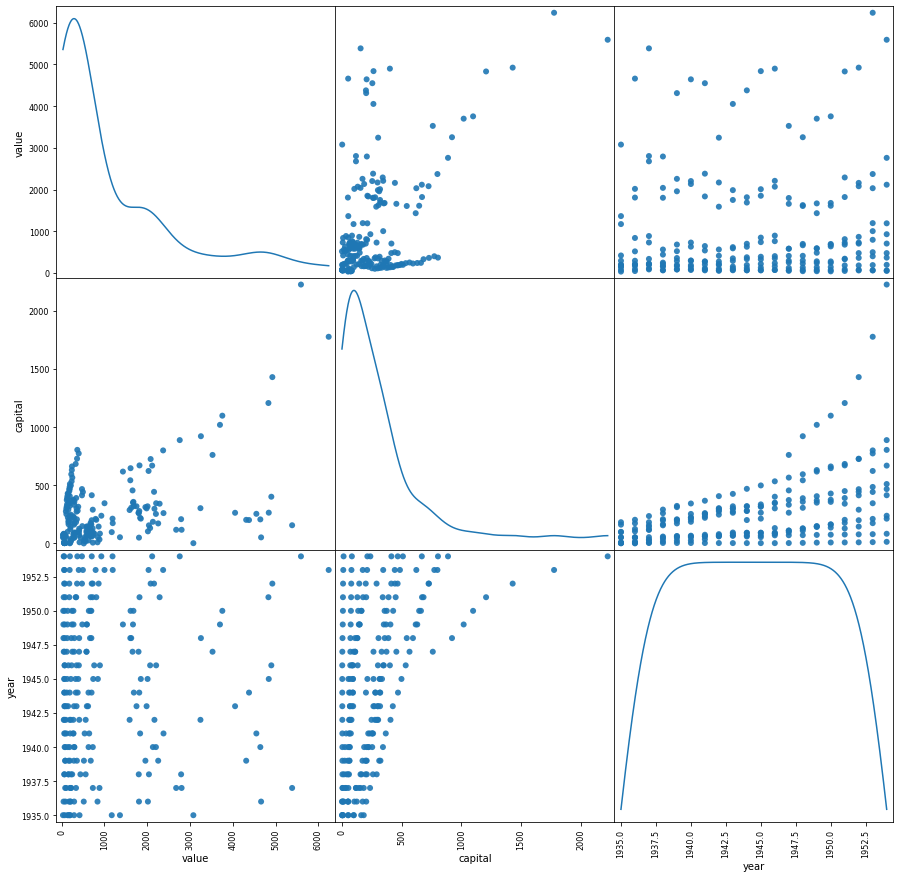

In [90]:
subsetd = grf[['value','firm','capital', 'year']]
pd.plotting.scatter_matrix(subsetd, alpha=0.9, marker="o", figsize=(15,15),diagonal = 'kde', grid=True)

### Correlation 

In [91]:
subsetd.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\awrap\AppData\Local\Temp/ipykernel_9992/3037209079.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  subsetd.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,value,capital,year
value,1.00,0.51,0.06
capital,0.51,1.00,0.48
year,0.06,0.48,1.00


## Reference

#### [Visualization with Matplotlib - Chapter 4](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)
#### [Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
#### [Adding annotation or  text to plots](https://matplotlib.org/3.1.1/tutorials/text/text_intro.html#:~:text=%20%20%20%20pyplot%20API%20%20,Axes%20's%20y-axis.%20%203%20more%20rows)
#### [Pandas Boxplot documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)
